In [0]:
! pip install np
! pip install sklearn
! pip install sklearn_nature_inspired_algorithms==0.4.0

In [0]:
from sklearn.metrics import classification_report

# Hyper-Parameter Tunning Using Nature Inspired Algorithms 

In this notebook we will compare the performance of several nature inspired search on hyper-parameter tunning task.

We will use [CoverType](https://archive.ics.uci.edu/ml/datasets/covertype) dataset which can be used for classification tasks.

We will hyper-tune parameters of the RandomForestClassifier.

## Dataset

Firstly, we will load the dataset, since it is really big (and we will make many experiments) we will train only on 1% of its size.



In [0]:
import random

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype

X, y = fetch_covtype(download_if_missing=True, return_X_y=True)

# shrink the dataset to the 1% of its original size
rows_id = random.sample(range(0, len(X) - 1), (int)(len(X) * 0.01))

X = X[rows_id, :]
y = y[rows_id]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'train size - {len(X_train)}\ntest size - {len(X_test)}')

train size - 4648
test size - 1162


## Hyper-parameters

Now, we will define the `param_grid` which we will be optimizing. 

In [0]:
param_grid = { 
    'n_estimators': range(20, 400, 20), 
    'max_depth': range(5, 300, 20),
    'min_samples_split': range(2, 50, 5),
    'max_features': ["auto", "sqrt", "log2"],
}

In [0]:
import numpy as np

print(f'This is {np.multiply.reduce([len(param) for param in param_grid.values()])} combinations in total.')

This is 8550 combinations in total.


### Optimization

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn_nature_inspired_algorithms.model_selection.nature_inspired_search_cv import NatureInspiredSearchCV
from sklearn_nature_inspired_algorithms.helpers import score_by_generation_lineplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Now we will optimize hyper-parameters. We will compare the following algorithms:

1.   Bat algorithm
2.   Hybrid bat algorithm
3.   Firefly algorithm

All of our optimization runs, will use the following settings:

*   `cv=5` - 5 fold cross-validation
*   `max_n_gen=100` - we will optimize at max 100 generations
*   `max_stagnating_gen=5` - the search algorithm will stop, if it does not find a better solution for 10 generations
*   `population_size=50` - in each generation we will train (at max) 50 models, since we are searching a pretty large space, we need to have more models in one population 
*   `runs=3` - each algorithm will run 3 times





### Bat Algorithm

In [0]:
%%time

clf = RandomForestClassifier(random_state=42)

nia_search = NatureInspiredSearchCV(
    clf,
    param_grid,
    cv=5,
    verbose=0,
    algorithm='ba',
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=5,
    runs=3,
    n_jobs=-1,
    scoring='f1_macro')

nia_search.fit(X_train, y_train)

Fitting 5 folds for some of the 8550 candidates, which might total in 42750 fits


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 8.18 s, sys: 380 ms, total: 8.56 s
Wall time: 33min 7s


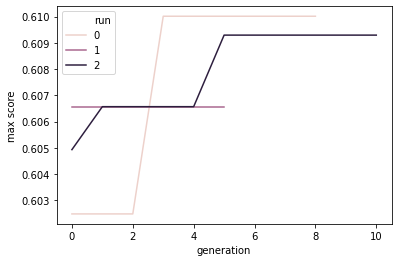

In [0]:
score_by_generation_lineplot(nia_search)

In [0]:
nia_search.best_params_

{'max_depth': 225,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 120}

In [0]:
clf = RandomForestClassifier(**nia_search.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.7536    0.7518    0.7527       415
           2     0.7787    0.8397    0.8080       574
           3     0.6951    0.7808    0.7355        73
           4     0.0000    0.0000    0.0000         6
           5     0.8000    0.2353    0.3636        17
           6     0.6316    0.3158    0.4211        38
           7     0.9545    0.5385    0.6885        39

    accuracy                         0.7642      1162
   macro avg     0.6591    0.4946    0.5385      1162
weighted avg     0.7619    0.7642    0.7564      1162



### Hybrid Bat algorithm

In [0]:
%%time

clf = RandomForestClassifier(random_state=42)

nia_search = NatureInspiredSearchCV(
    clf,
    param_grid,
    cv=5,
    verbose=0,
    algorithm='hba',
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=5,
    runs=3,
    n_jobs=-1,
    scoring='f1_macro')

nia_search.fit(X_train, y_train)

Fitting 5 folds for some of the 8550 candidates, which might total in 42750 fits
CPU times: user 18.3 s, sys: 621 ms, total: 18.9 s
Wall time: 1h 6min 38s


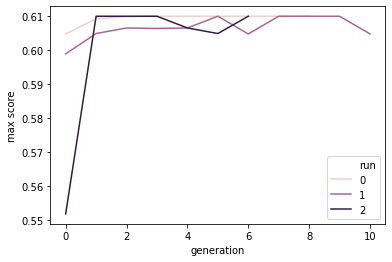

In [0]:
score_by_generation_lineplot(nia_search)

In [0]:
nia_search.best_params_

{'max_depth': 85,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 120}

In [0]:
clf = RandomForestClassifier(**nia_search.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.7536    0.7518    0.7527       415
           2     0.7787    0.8397    0.8080       574
           3     0.6951    0.7808    0.7355        73
           4     0.0000    0.0000    0.0000         6
           5     0.8000    0.2353    0.3636        17
           6     0.6316    0.3158    0.4211        38
           7     0.9545    0.5385    0.6885        39

    accuracy                         0.7642      1162
   macro avg     0.6591    0.4946    0.5385      1162
weighted avg     0.7619    0.7642    0.7564      1162



### Firefly Algorithm

In [0]:
%%time

clf = RandomForestClassifier(random_state=42)

nia_search = NatureInspiredSearchCV(
    clf,
    param_grid,
    cv=5,
    verbose=0,
    algorithm='fa',
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=5,
    runs=3,
    n_jobs=-1,
    scoring='f1_macro')

nia_search.fit(X_train, y_train)

Fitting 5 folds for some of the 8550 candidates, which might total in 42750 fits
CPU times: user 30.3 s, sys: 862 ms, total: 31.2 s
Wall time: 1h 44min 44s


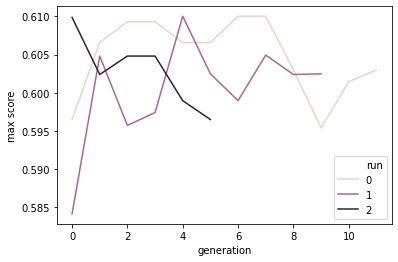

In [18]:
score_by_generation_lineplot(nia_search)

In [19]:
nia_search.best_params_

{'max_depth': 65,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 120}

In [28]:
clf = RandomForestClassifier(**nia_search.best_params_, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.7536    0.7518    0.7527       415
           2     0.7787    0.8397    0.8080       574
           3     0.6951    0.7808    0.7355        73
           4     0.0000    0.0000    0.0000         6
           5     0.8000    0.2353    0.3636        17
           6     0.6316    0.3158    0.4211        38
           7     0.9545    0.5385    0.6885        39

    accuracy                         0.7642      1162
   macro avg     0.6591    0.4946    0.5385      1162
weighted avg     0.7619    0.7642    0.7564      1162



## Results

| Algorithm | F1 Macro score  | Search duration |
| ------------ |-------------:|-------------:|
| Bat Algorithm | 0.5385 | 33min 7s |
| Hybrid Bat Algorithm | 0.5385 | 1h 6min 38s |
| Firefly Algorithm | 0.5385 | 1h 44min 44s |
